# Problem Statement.
- A real estate company wants to build homes at different locations in Boston .They have data for historical prices but hav'nt decided the actual prices yet . they want to price it so that it is affordable to the general public.

# Objective .
- Analyze the data and predict the approximate prices for the houses.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("BostonHousing.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


The Boston Housing dataset is a famous dataset used in machine learning and statistics, particularly in regression problems. It contains information about various factors (features) that can influence housing prices in different areas of Boston. Below is a brief explanation of each feature:

1. **CRIM (Per Capita Crime Rate by Town)**: This represents the crime rate in a particular town. Higher crime rates are generally associated with lower housing prices.

2. **ZN (Proportion of Residential Land Zoned for Lots Over 25,000 sq. ft.)**:  ZN represents the proportion of land zoned for residential lots that are larger than 25,000 square feet.

3. **INDUS (Proportion of Non-Retail Business Acres per Town)**: This measures the proportion of land that is used for industrial purposes in a town. Higher values might be associated with lower housing prices due to the potential pollution or noise associated with industrial areas.

4. **CHAS (Charles River Dummy Variable)**: CHAS = 1: Property is close to the Charles River.,CHAS = 0: Property is not close to the Charles River.

5. **NOX (Nitric Oxide Concentration)**: This measures the concentration of nitric oxide, an indicator of air pollution. Higher pollution levels are typically associated with lower housing prices.

6. **RM (Average Number of Rooms per Dwelling)**: values to reflect the mean number of rooms across all houses in a particular area.

7. **AGE (Proportion of Owner-Occupied Units Built Prior to 1940)**: represents the percentage of homes in a town that were built before 1940. A higher **AGE** value means there are more older homes, which could be associated with lower housing prices due to aging properties.
8. **DIS (Weighted Distance to Five Boston Employment Centers)**: This measures the distance to major employment centers in Boston. Properties closer to these centers are generally more desirable and may have higher prices.

9. **RAD (Index of Accessibility to Radial Highways)**: A higher value suggests better accessibility to the highways, which could influence property values due to ease of commuting.
    
11. **TAX (Full-Value Property Tax Rate per $10,000)**: This represents the property tax rate. Higher taxes can make owning a home more expensive, potentially lowering housing prices.

12. **PTRATIO (Pupil-Teacher Ratio by Town)**: This represents the number of students per teacher in local schools. Lower ratios are generally considered better, which can positively influence housing prices.

13. **B (1000(Bk - 0.63)^2 where Bk is the Proportion of Black Residents by Town)**: This variable measures the proportion of Black residents in a town. It reflects the demographics of a town, although its interpretation is controversial due to its social implications.

14. **LSTAT (Percentage of Lower Status of the Population)**: This measures the percentage of the population in the lower economic status. Higher values are often associated with lower housing prices.

15. **MEDV (Median Value of Owner-Occupied Homes in $1,000s)**: This is the target variable, representing the median value of homes in the area. It is the variable that a regression model would typically aim to predict based on the other features.

These features collectively help in understanding the factors that influence housing prices in Boston, making the dataset valuable for predictive modeling and analysis in real estate and urban planning.

In [2]:
df.shape    # 506 sample and 14 features.

(506, 14)

In [3]:
df.info()   # all are numerical features 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.isnull().sum()  # null values are present in 6 columns.

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
# Remove rows with NaN values in any column
df = df.dropna()


In [6]:
df.isnull().sum()    # All null values are removed.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.shape

(394, 14)

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.shape   # now 394 rows after removing nan values.

(394, 14)

In [10]:
features = df.columns
features

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
df['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [12]:
df['MEDV'].unique()

array([24. , 21.6, 34.7, 33.4, 28.7, 27.1, 16.5, 15. , 18.9, 21.7, 20.4,
       19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9,
       16.6, 14.8, 18.4, 21. , 12.7, 13.2, 13.1, 13.5, 24.7, 30.8, 34.9,
       26.6, 25.3, 21.2, 19.3, 20. , 14.4, 19.4, 19.7, 25. , 35.4, 31.6,
       23.3, 18.7, 16. , 22.2, 33. , 23.5, 22. , 17.4, 20.9, 24.2, 22.8,
       21.4, 20.8, 28. , 23.9, 24.8, 22.9, 22.5, 23.6, 22.6, 20.6, 28.4,
       38.7, 43.8, 33.2, 27.5, 26.5, 18.6, 20.1, 19.5, 19.8, 18.8, 18.5,
       19.2, 20.3, 20.5, 16.2, 18. , 14.3, 23. , 18.1, 17.1, 17.8, 14. ,
       13.4, 11.8, 13.8, 15.4, 17. , 24.3, 27. , 50. , 22.7, 23.8, 22.3,
       19.1, 29.4, 23.2, 29.9, 37.2, 39.8, 36.2, 37.9, 26.4, 29.6, 32. ,
       29.8, 37. , 29.1, 30.3, 34.6, 32.9, 24.1, 42.3, 48.5, 24.4, 22.4,
       28.1, 23.7, 21.5, 26.7, 30.1, 44.8, 31.7, 41.7, 29. , 31.5, 17.6,
       24.5, 26.2, 42.8, 44. , 36. , 33.8, 43.1, 31. , 36.5, 43.5, 20.7,
       21.1, 35.2, 32.4, 35.1, 45.4, 46. , 32.2, 28

# Feature distribution .
 
**Numerical** = 1.CRIM ,  2.ZN , 3.INDUS , 4. NOX  , 5 .RM  , 6 . AGE , 7. DIS . 8 . RAD , 9.TAX , 10. PTRATIO , 11. B , 12.LSTAT,13.MEDAV 
  
**Categorical** = 1.CHAS  

# Univariate analysis.

# CHAS . 
- 1: Property is close to the Charles River
- 0: Property is not close to the Charles River.

- **Insights**
- Only 27(6.9%) areas are close to Charles River

- **Preprocessing**

In [13]:
CHAS_count=df['CHAS'].value_counts()  
CHAS_count

CHAS
0.0    367
1.0     27
Name: count, dtype: int64

In [14]:
x= 27/CHAS_count.sum()*100
x

6.852791878172589

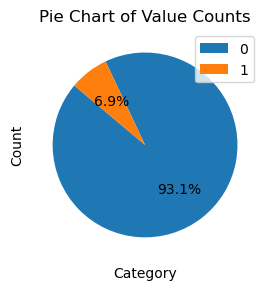

In [15]:
plt.figure(figsize=(5,3))
plt.pie(CHAS_count, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Value Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(['0', '1'])
plt.show()

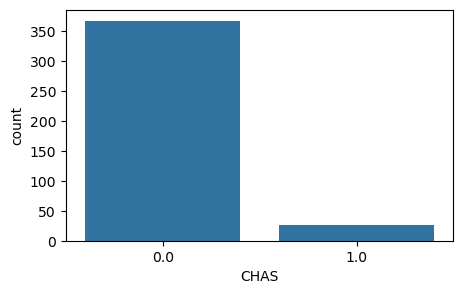

In [16]:
plt.figure(figsize= (5,3))
sns.barplot(CHAS_count)
plt.show()

 - Only 27(6.9%) areas are close to Charles River

# 2.CRIM 

**Insights**
- The Histogram shows highlly right skeweed it means d most of the values are close to Zero means most of the areas are in low crim rate
  .

##### *Preprocessin 

- we need to transform the feature for model building.
- There are some outliers but we can decidede to not remove any outliers.*

In [17]:
df['CRIM'].describe()

count    394.000000
mean       3.690136
std        9.202423
min        0.006320
25%        0.081955
50%        0.268880
75%        3.435973
max       88.976200
Name: CRIM, dtype: float64

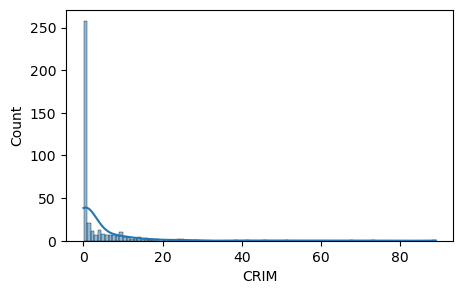

In [18]:
plt.figure(figsize=(5,3))
sns.histplot(df['CRIM'],kde=True)
plt.show()

- The Histogram shows highlly right skeweed .
- And most of the values are close to Zero means most of the areas are in low crim rate.

In [19]:
df['CRIM'].skew()

5.256933799622241

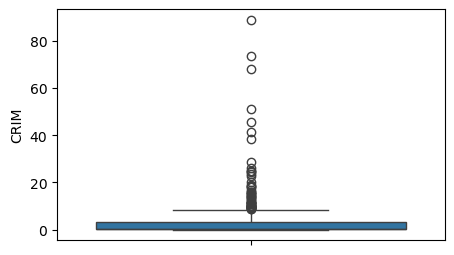

In [20]:
plt.figure(figsize=(5,3))  # So many outliers are present.
sns.boxplot(df['CRIM'])
plt.show()

In [21]:
# outlier detection .
def detect_outliers(data):
    Q1 = np.quantile(data,0.25)
    Q3 = np.quantile(data,0.75)

    IQR = Q3 - Q1

    lower_bond = Q1 - 1.5 * IQR
    upper_bond = Q3 + 1.5 * IQR

    outliers = [x for x in data if x < lower_bond or x > upper_bond]
    return outliers

In [22]:
# detect_outliers(df['CRIM'])

# 3.ZN 

**Insights**
- According to the Histogram its shows a highlly right skweeed means most of the areas have small area of Homes but few have area over 25000 sq feet


##### Preprocessing
- Outliers are present but we can not remove any outliers yet.
- We need to transform this feature.

In [23]:
df['ZN'].describe()

count    394.000000
mean      11.460660
std       23.954082
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

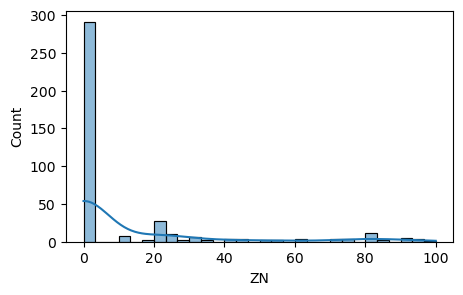

In [24]:
plt.figure(figsize=(5,3))
sns.histplot(df['ZN'],kde=True)
plt.show()

- According to the Histogram its shows a highlly right skweeed means most of the areas have small area of Homes but few have area over 25000 sq feet

In [25]:
df['ZN'].skew()

2.2582753817605536

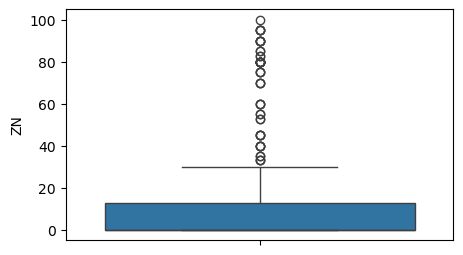

In [26]:
plt.figure(figsize=(5,3))  # So many outliers are present.
sns.boxplot(df['ZN'])
plt.show()

In [27]:
# detect_outliers(df['ZN'])

# 4. INDUS

**Insights**
- According to Histogram its shows almost normally distributed and Bimodal means 2 peaks means data peaks high are at two points around 4 to 8 and 18 to 20 with higher frequency 
it means most of the industrial area around 4 to 8 percent and 18 to 20 percent.

**Preprocessing**

In [28]:
df['INDUS'].describe()

count    394.000000
mean      11.000863
std        6.908364
min        0.460000
25%        5.130000
50%        8.560000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

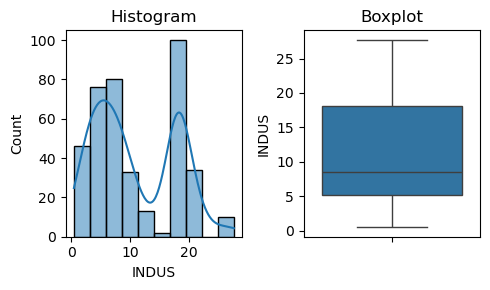

In [29]:
def graphs(data):
  """Plots a histogram and boxplot of the data side-by-side."""

  # Create a subplot grid
  fig, axes = plt.subplots(1, 2, figsize=(5, 3))

  # Plot the histogram
  sns.histplot(data, kde=True, ax=axes[0])
  axes[0].set_title("Histogram")

  # Plot the boxplot
  sns.boxplot(data, ax=axes[1])
  axes[1].set_title("Boxplot")

  # Adjust layout
  plt.tight_layout()
  plt.show()

graphs(df['INDUS'])

- According to Histogram its shows almost normally distributed and Bimodal means 2 peaks means data peaks high are at two points around  4 to 8 and 18 to 20 with higher frequency.
- it means most of the industrial area around 4 to 8 percent and 18 to 20 percent.


In [30]:
df['INDUS'].skew()

0.35879198170143367

# 5.NOX
- **Insights**
- According to Histogram data is slightlly right skeweed it means most of the area are under less poluted area .

- **Preprocessing**
- Outliers are not presented area.

In [31]:
df['NOX'].describe()

count    394.000000
mean       0.553215
std        0.113112
min        0.389000
25%        0.453000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

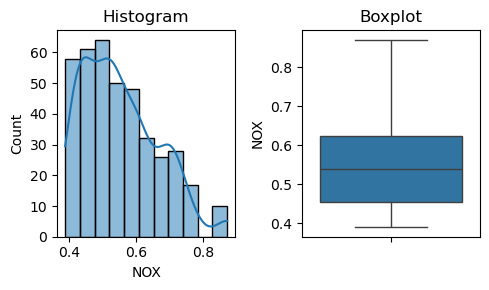

In [32]:
graphs(df['NOX'])

- According to Histogram data is slightlly right skeweed it means most of the area are under less poluted area .
- Outliers are not present .

In [33]:
df['NOX'].skew()

0.7033773563943626

# 6.RM
- **Insights**
- Data was normally distributed it means most of the area have a average room was around 6 

- **Preprocessing**
- Outliers are present but we can not remove outliers.

In [34]:
df['RM'].describe()  # Average room per area are around 6.28

count    394.000000
mean       6.280015
std        0.697985
min        3.561000
25%        5.879250
50%        6.201500
75%        6.605500
max        8.780000
Name: RM, dtype: float64

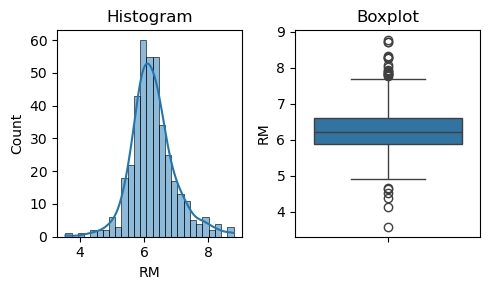

In [35]:
graphs(df['RM'])

- Data was normally distributed it means most of the area have a average room was around 6 .
- Outliers are present but we can not remove outliers.

In [36]:
df['RM'].skew()

0.4875580780384036

# 7. AGE

- **Insights**
- average percentage of home build before 1940 was 68.93.
- According to Histogram data was slightlly left skeweed data was concenterated towards left it means most of the Houses are old.

- **Preprocessing**
- Outliers are not present in a data.

In [37]:
df['AGE'].describe()   # average percentage of home build before 1940 was 68.93.

count    394.000000
mean      68.932741
std       27.888705
min        2.900000
25%       45.475000
50%       77.700000
75%       94.250000
max      100.000000
Name: AGE, dtype: float64

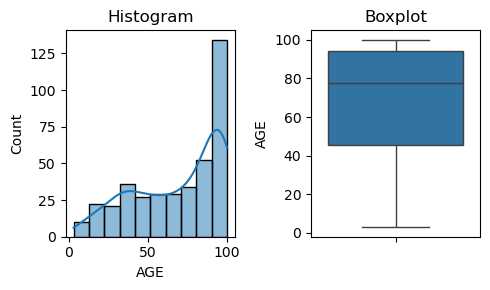

In [38]:
graphs(df['AGE'])

- According to Histogram data was slightlly left skeweed data was concenterated towards left it means most of the Houses are old.
- Outliers are not present in a data.

In [39]:
df['AGE'].skew()

-0.5948795143516377

# 8 . DIS
- **Insights**
- According to histogram data was right skeweed data was concentrated towards left it means from most of the areas the employment centers are close.

- **Preprocessing**
- Few outliers are present we can remove this outliers later.

In [40]:
df['DIS'].describe()   # Average distance to Employment centers was 3.80 miles/kilometers.

count    394.000000
mean       3.805268
std        2.098571
min        1.129600
25%        2.110100
50%        3.199200
75%        5.116700
max       12.126500
Name: DIS, dtype: float64

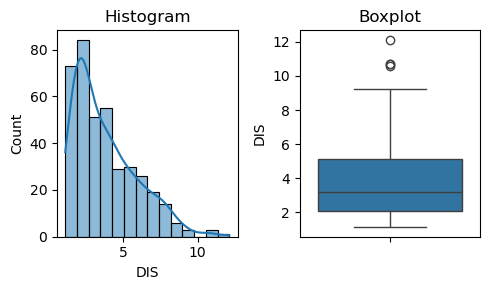

In [41]:
graphs(df['DIS'])

- According to histogram data was right skeweed data was concentrated towards left it means from most of the areas the employment centers are close.
- Few outliers are present .

In [42]:
df['DIS'].skew()

1.0326249012839293

# 9.RAD.
- **Insights**
-According to histogram the data was sligtlly right  SKeweed it means most of the areas have lesss  connectivity with highways But almost more than 25% areas have a good connectivity with highways.

- **Preprocessing**
- Outliers are not present.
- however we need to transform this feature.

In [43]:
df['RAD'].describe()

count    394.000000
mean       9.403553
std        8.633451
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64

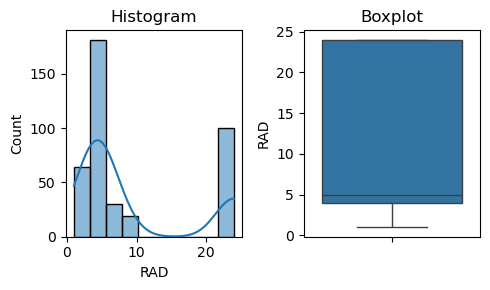

In [44]:
graphs(df['RAD'])

- According to histogram the data was sligtlly right  SKeweed it means most of the areas have lesss  connectivity with highways But almost more than 25% areas have a good connectivity with highways.
- Outliers are present but we can not remove his outliers.

In [45]:
df['RAD'].skew()

1.050143918802174

# 10. TAX.

**Insights**
-  Average tax rate was 406.43.
- According to histogram data was slightlly right skeweed but close to zero almost normally distributed but it shows bimodal it means in most of areas the tax rate was below 400 However but more than 25% areas have a higher tax rates.

**Preprocessing**
- No outliers are present.

In [46]:
df['TAX'].describe()   # Average tax rate was 406.43.

count    394.000000
mean     406.431472
std      168.312419
min      187.000000
25%      280.250000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

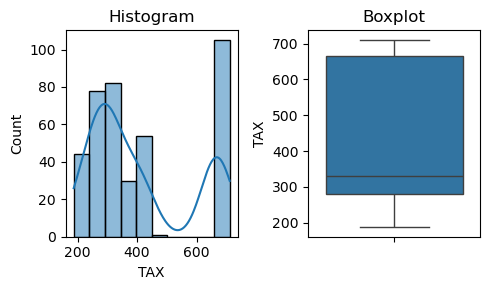

In [47]:
graphs(df['TAX'])

- According to histogram data was slightlly right skeweed but close to zero almost normally distributed but it shows bimodal it means in most of areas the tax rate was below 400 However but more than 25% areas have a higher tax rates.
- No outliers are present.

In [48]:
df['TAX'].skew()

0.6928762212158767

# 11 .PTRATIO

- **Insights**
- According to Histogram the data was sligtlly left skweed the concentration of data around 18-20 it means ration are good.

- **Preprocessing**.
- Some minor outliers are present but this outliers are usefull we can not remove this

df['PTRATIO'].describe()  # average ration of teacher student is around 18.53.

In [49]:
df['PTRATIO'].skew()

-0.8844753980294102

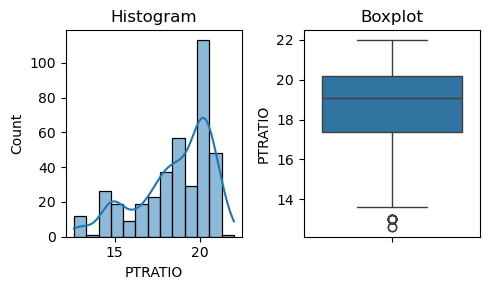

In [50]:
graphs(df['PTRATIO'])

- According to Histogram the data was sligtlly left skweed the concentration of data around 18-20 it means ration are good.
- Some minor outliers are present but this outliers are usefull we can not remove this.

# 12 .B

- **Insights**

- **Preprocessing**
- OUtliers are present we need to remove this.
- WE need to apply transformation in a dataset.
    

In [51]:
df['B'].describe()

count    394.000000
mean     358.490939
std       89.283295
min        2.600000
25%      376.707500
50%      392.190000
75%      396.900000
max      396.900000
Name: B, dtype: float64

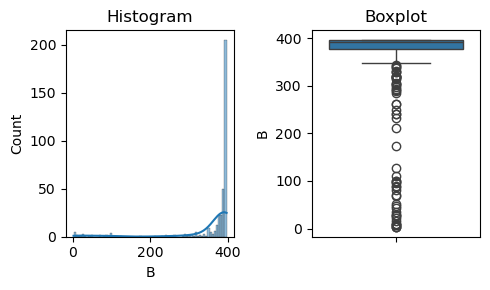

In [52]:
graphs(df['B'])

- Both plots suggest that the 'B' feature in the Boston Housing Dataset is skewed towards higher values, indicating a higher level of racial segregation in many neighborhoods. While the majority of neighborhoods have 'B' values around 390-395, there are some outliers with lower or higher values, suggesting a range of segregation levels.

# 13. LSTAT

- **Insights**
- According to histogram the data was slightlly right skweed it means the percentage people of lower economic status in most of areas is low around 10%.

- **Preprocessing**
- Some outliers are present so we need to remove this outliers.

In [53]:
df['LSTAT'].describe()   # Average percentage of lower economic stats area is 12 %.

count    394.000000
mean      12.769112
std        7.308430
min        1.730000
25%        7.125000
50%       11.300000
75%       17.117500
max       37.970000
Name: LSTAT, dtype: float64

In [54]:
df['LSTAT'].skew()

0.9426647803194949

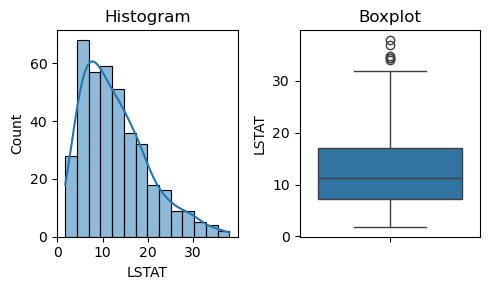

In [55]:
graphs(df['LSTAT'])

- According to histogram the data was slightlly right skweed it means the percentage people of lower economic status in most of areas is low around 10%.
- Some outliers are present so we need to remove this outliers.

# 14.MEDV

- **Insights**
- According to Histogram the data was sligtlly right skeweed some extreme values are present it means some homes are very expensive to others.

- **Preprocessing**
- We can need to transformation in this features.
- The outliers are present so we need to remove this outliers

In [56]:
df['MEDV'].describe()  # The average prices of homes around 22.35 thousand doulars.

count    394.000000
mean      22.359645
std        9.142979
min        5.000000
25%       16.800000
50%       21.050000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [57]:
df['MEDV'].skew()

1.0659462275359775

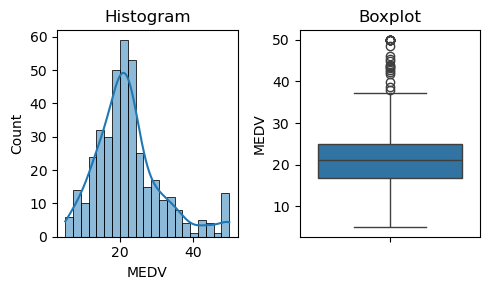

In [58]:
graphs(df['MEDV'])

- According to Histogram the data was sligtlly right skeweed some extreme values are present it means some homes are very expensive to others.
- The outliers are present so we need to remove this outliers.

# Bivariate analysis.

In [59]:
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


# MEDV & CHAS.

In [60]:
mean = df.groupby('CHAS')['MEDV'].mean()
mean

CHAS
0.0    21.929428
1.0    28.207407
Name: MEDV, dtype: float64

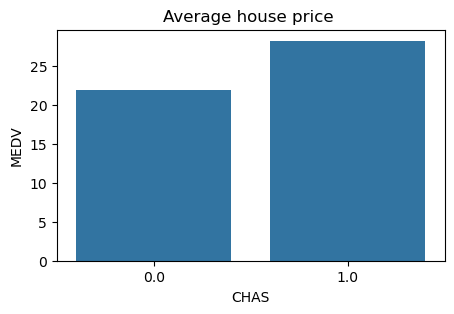

In [61]:
plt.figure(figsize=(5,3))
sns.barplot(mean)
plt.title("Average house price ")
plt.show()

- The house is near to river have higher house prices than other areas houses.

<Figure size 500x500 with 0 Axes>

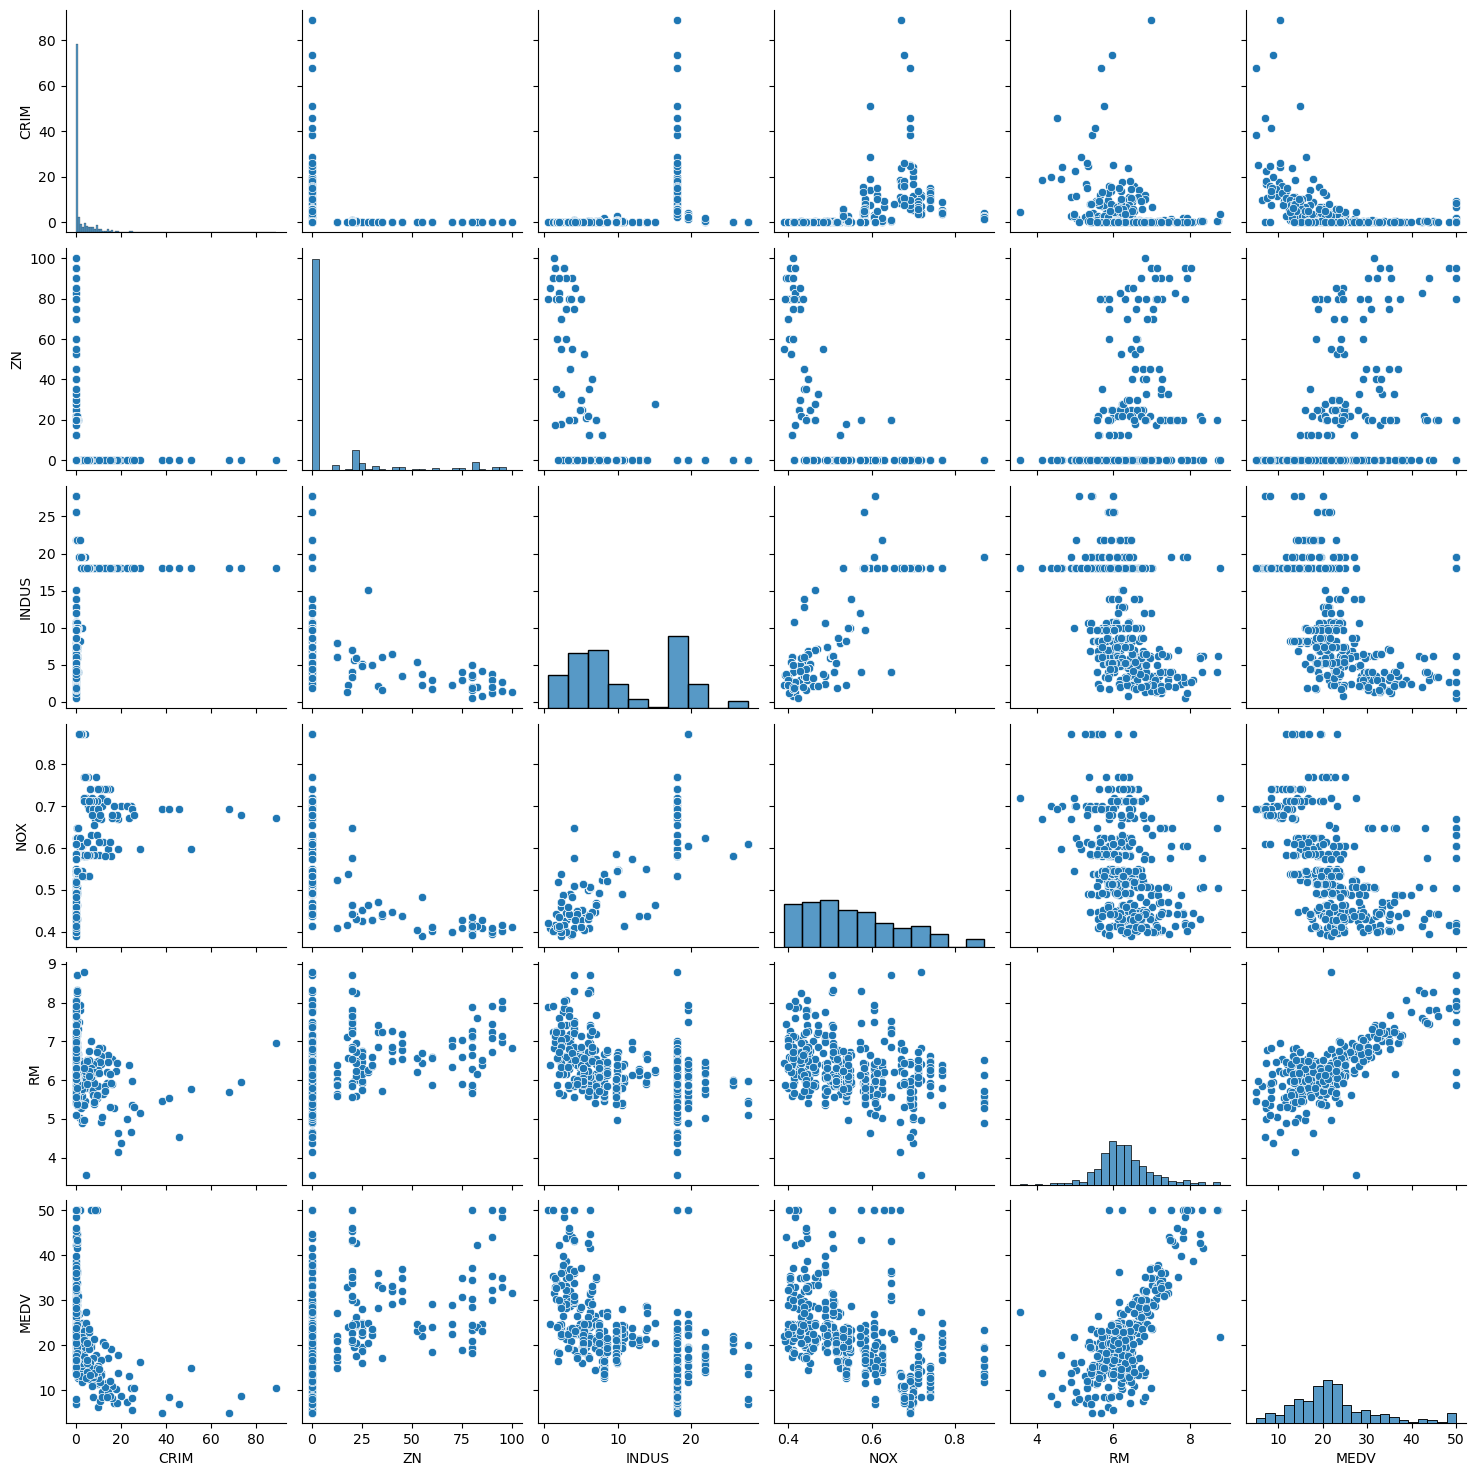

In [62]:
feature = df[['CRIM',	'ZN',	'INDUS',	'NOX'	,'RM','MEDV']]
plt.figure(figsize=(5,5))
sns.pairplot(feature)
plt.show()


**MEDV** is the target variable in this dataset, representing the median value of owner-occupied homes in $1000s. It's essentially the house price.

**Analyzing Feature Correlations:**

The following are interpretations of the correlations between various features and MEDV:

1. **RM (Average Number of Rooms per Dwelling):**
   * **Strong Positive Correlation:** As the average number of rooms increases, the median house price tends to increase. This suggests that larger homes generally command higher prices.

2. **NOX (Nitric Oxides Concentration):**
   * **Moderate Negative Correlation:** Higher levels of nitric oxide pollution are associated with lower house prices. This might be due to health concerns and reduced quality of life in areas with high pollution.

3. **CRIM (Crime Rate):**
   * **Moderate Negative Correlation:** Areas with higher crime rates typically have lower house prices. This is likely because high crime rates can deter potential buyers and reduce property values.

4. **INDUS (Proportion of Non-Retail Business Acres):**
   * **Negative Correlation:** A higher proportion of industrial land can negatively impact house prices. This might be due to factors like noise pollution, traffic congestion, and potential environmental hazards associated with industrial areas.

5. **ZN (Proportion of Zones in the Neighborhood for Lots over 25,000 sq.ft):**
   * **Moderate Positive Correlation:** Larger lot sizes (areas) are generally associated with higher house prices. This could be due to factors like privacy, space, and potential for outdoor amenities.




<Figure size 500x500 with 0 Axes>

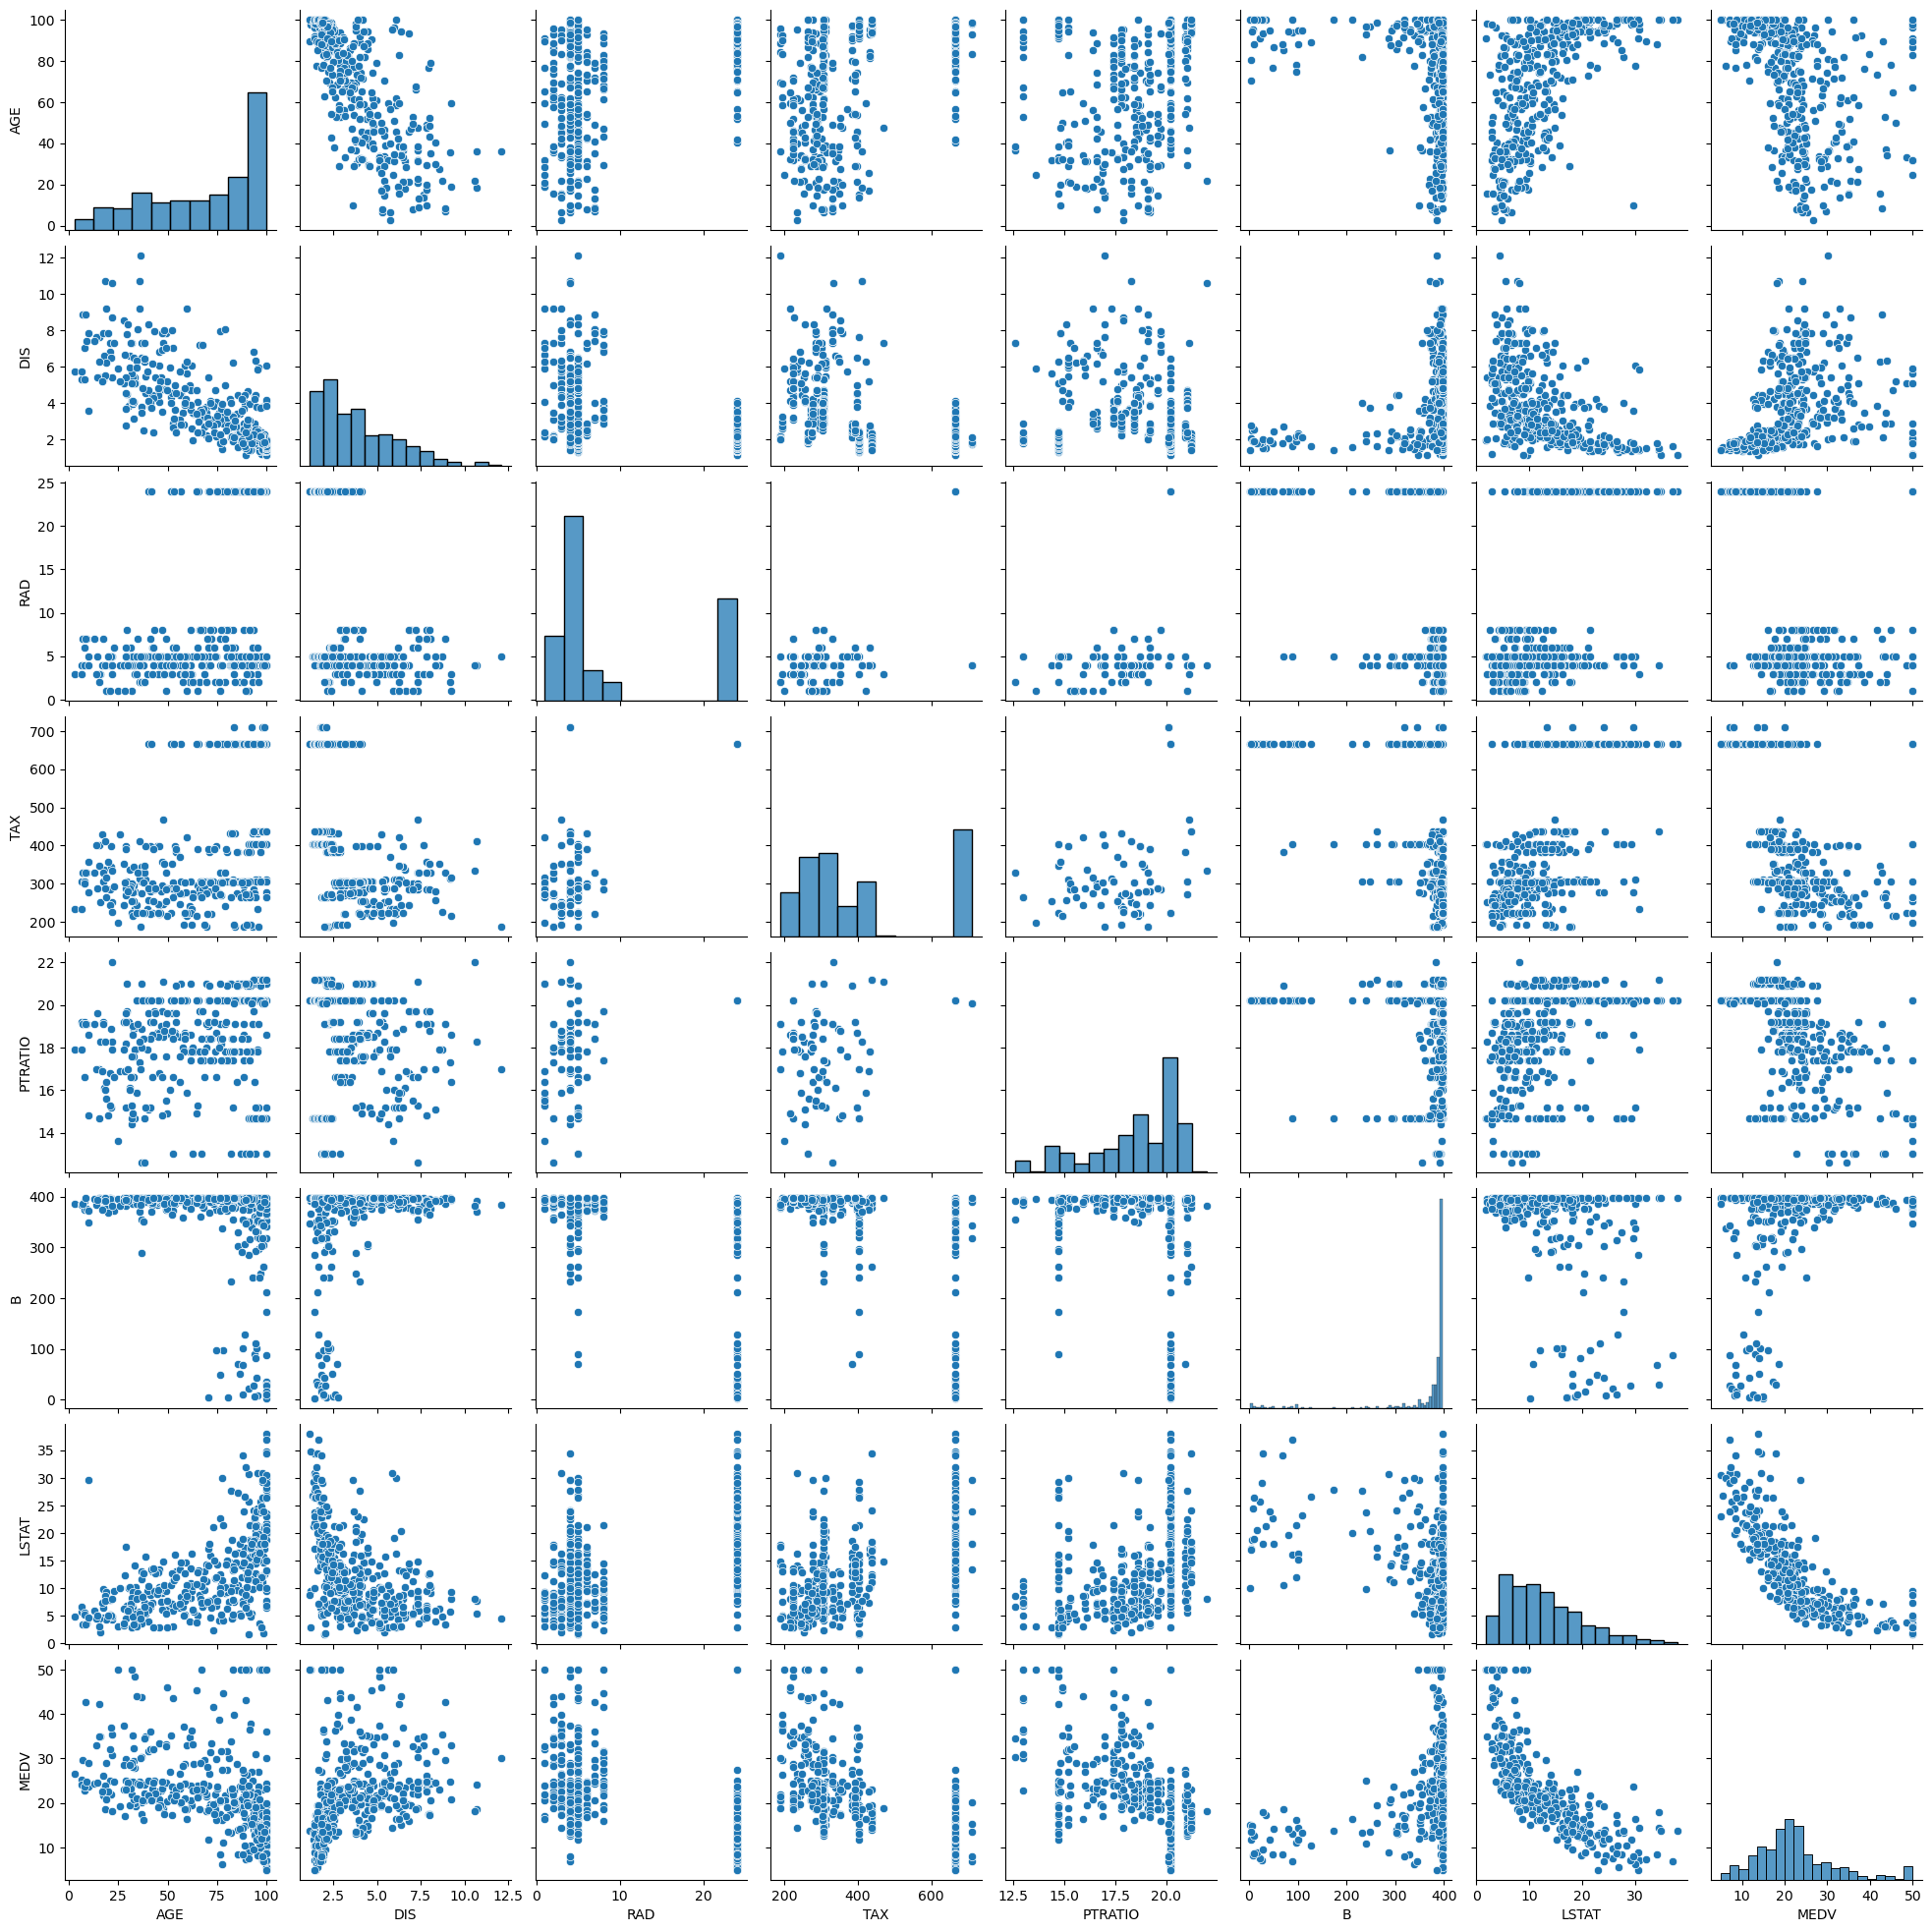

In [63]:
feature_1= df[['AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT' ,'MEDV']]
plt.figure(figsize=(5,5))
sns.pairplot(feature_1)
plt.show()



1. **AGE**: AGE shows a moderate negative correlation with MEDV, indicating that if houses are older, it tends to negatively affect house prices.

2. **DIS**: DIS shows a slightly positive correlation with MEDV, meaning that proximity to the five employment centers of Boston is associated with an increase in house prices.

3. **RAD**: RAD shows a negative correlation with MEDV, suggesting that houses closer to highways tend to have lower prices.

4. **TAX**: TAX shows a negative correlation with MEDV, indicating that as property taxes increase, house prices tend to decrease.

5. **PTRATIO**: PTRATIO shows a negative correlation with MEDV, meaning that as the teacher-student ratio increases, house prices tend to decrease.

6. **B**: B shows a positive correlation with MEDV, indicating that as the percentage of the Black population increases, house prices also tend to increase.

7. **LSTAT**: LSTAT shows a highly negative correlation with MEDV, meaning that as the percentage of lower economic status people increases in certain areas, house prices tend to decrease.

In [64]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [65]:
feature_2 = df[['CRIM', 'ZN', 'INDUS',  'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']]

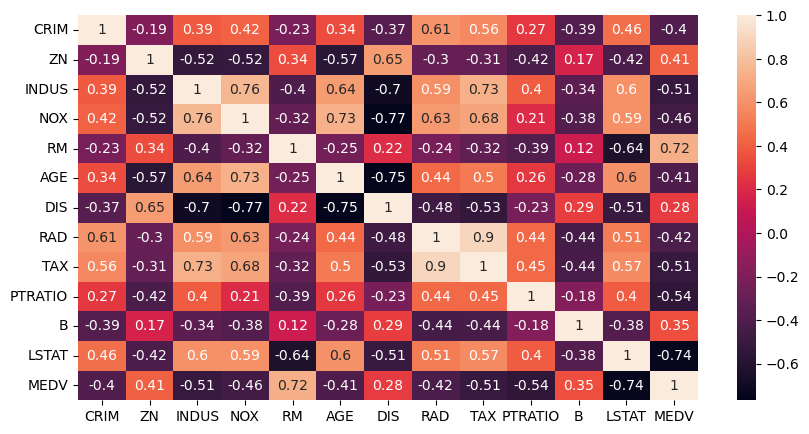

In [66]:
plt.figure(figsize=(10,5))
correlation = feature_2.corr()
sns.heatmap(correlation,annot=True)
plt.show()

# Removing outliers.
- According to our analysis we can decided to removing outliers from some features .
- MEDV , LSTAT ,B , DIS .

In [67]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

# Define the features you want to check for outliers
features_to_check = ['MEDV', 'LSTAT', 'B', 'DIS']

# Remove outliers in the same DataFrame
df = remove_outliers_iqr(df, features_to_check)

print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
499  0.17783   0.0   9.69   0.0  0.585  5.569  73.5  2.3999    6  391   
500  0.22438   0.0   9.69   0.0  0.585  6.027  79.7  2.4982    6  391   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [68]:
df.shape    # now outliers are removed.

(302, 14)

# NOw we can apply transformation on some features.

-   RAD ,ZN,CRIM


In [69]:
df['B'].skew()

-2.0320416747487835

In [70]:
df['RAD'].skew()

1.5168642544344046

In [71]:
df['ZN'].skew()

2.1797526627567536

In [72]:
df['CRIM'].skew()

7.403597443038766

# Apply log transformation on positive skweed data.

In [73]:
df['RAD_log'] = np.log(df['RAD'] + 1)

In [74]:
df['RAD_log'].skew()

0.8548856888005584

In [75]:
df['CRIM_log'] = np.log(df['CRIM'])

In [76]:
df['CRIM_log'].skew()

0.7117220751257879

In [77]:
df['ZN_log'] = np.log(df['ZN']+1)

In [78]:
df['ZN_log'].skew()

1.088924116265666

In [79]:
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RAD_log,CRIM_log,ZN_log
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0,0.693147,-5.064036,2.944439


In [80]:
df.to_csv('df_clean.csv', index=False)


In [81]:
data= pd.read_csv('df_clean.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RAD_log,CRIM_log,ZN_log
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.693147,-5.064036,2.944439
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1.098612,-3.600502,0.000000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1.098612,-3.601235,0.000000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1.386294,-3.430523,0.000000
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,1.386294,-3.511570,0.000000


In [82]:
data = data.drop(columns=['RAD', 'ZN', 'CRIM'])
data.head()

,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,RAD_log,CRIM_log,ZN_log
0,2.31,0.0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0,0.693147,-5.064036,2.944439
1,7.07,0.0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6,1.098612,-3.600502,0.000000
2,7.07,0.0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7,1.098612,-3.601235,0.000000
3,2.18,0.0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4,1.386294,-3.430523,0.000000
4,2.18,0.0,0.458,6.430,58.7,6.0622,222,18.7,394.12,5.21,28.7,1.386294,-3.511570,0.000000


In [83]:
data.shape

(302, 14)

# SPlit the independent and dependent variable.

In [84]:
X = data.drop("MEDV",axis =1)   # Independent variables
y = data['MEDV']  # Dependent variable MEDV.

# Standardize the feature .

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Now independent variables are standardzied

# Split the dataset into training and testing sets

In [86]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 42)

In [87]:
X_train.shape

(241, 13)

In [88]:
X_test.shape

(61, 13)

In [89]:
y_train.shape

(241,)

In [90]:
y_test.shape

(61,)

# Apply multiple linear regression

In [91]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

# Predict on the test set

In [92]:
y_pred = model_1.predict(X_test)

In [93]:
y_pred # prediction 

array([28.68904605, 27.02507376, 17.0247067 , 15.41948266, 23.29040883,
       22.66035135, 25.53453722, 24.4586741 , 16.17719911, 21.89362198,
       19.41206027, 17.59778172, 19.47929394, 31.18792393, 29.91662462,
       19.72295386, 30.37255007, 28.35305843, 18.74791997, 16.71715991,
       24.73858321, 17.72744985, 17.67514545, 15.68655181, 27.44303947,
       21.74619005, 17.02296348, 28.6085195 , 25.40254849, 12.76646225,
       25.33235814, 18.57655312, 19.84194758, 30.46884455, 15.36983417,
       30.92464047, 22.72258092, 23.74939025, 17.56536177, 25.20995925,
       21.3764813 , 28.87349467, 15.31163735, 21.45290818, 19.05211917,
       14.64622055, 16.17760947, 23.51401866, 21.34231348, 27.51239161,
       24.43875615, 16.18885311, 26.05687013, 17.31125601, 20.67627317,
       18.49843969,  6.52842126, 16.65963365, 21.38129102, 32.15981893,
       27.88974557])

# Evaluate the model

In [94]:
from sklearn.metrics import mean_squared_error, r2_score
mse = np.sqrt(mean_squared_error(y_test, y_pred)) # error between predictin and y_test(actual values)
r2 = r2_score(y_test, y_pred)     # best fit line of prediction and actual.

In [95]:
print(f'Rooot Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Rooot Mean Squared Error: 2.94
R-squared: 0.76


# The residual plot shows:

1. **Non-Linearity:** There's a curved pattern in the residuals, suggesting that a linear model may not fully capture the relationship between variables.
2. **Heteroscedasticity:** The spread of residuals increases with predicted values, indicating that the error variance is not constant.
3. **Next Steps:** Consider using non-linear models, transforming variables, or addressing heteroscedasticity to improve model accuracy.

# OLS model.

In [96]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train).fit()



In [97]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     56.32
Date:                Mon, 26 Aug 2024   Prob (F-statistic):           1.71e-63
Time:                        13:09:04   Log-Likelihood:                -612.03
No. Observations:                 241   AIC:                             1252.
Df Residuals:                     227   BIC:                             1301.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0451      0.204    107.923      0.0

## Key Findings from the OLS Regression Model

**Model Summary:**

* **R-squared (0.763):** This indicates that approximately 76.3% of the variance in the dependent variable (MEDV) is explained by the independent variables in the model.
* **Adjusted R-squared (0.750):** This is a slightly adjusted R-squared that penalizes for the number of independent variables. It's still a strong value, suggesting that the model is explaining a significant portion of the variance.
* **F-statistic (56.32) and Prob (F-statistic) (1.71e-63):** These indicate the overall significance of the model. The high F-statistic and very low p-value suggest that the model is statistically significant, meaning at least one of the independent variables is significantly related to the dependent variable.

**Coefficient Interpretation:**

* **Intercept (const):** This represents the predicted value of MEDV when all independent variables are zero. In this case, it's 22.0451.
* **Independent Variables (x1, x2, ... x13):** The coefficients for these variables represent the change in MEDV for a one-unit increase in the corresponding independent variable, holding all other variables constant. For example, a one-unit increase in x1 (CRIM) is associated with a decrease of 0.1628 in MEDV.

**Statistical Significance:**

* **P>|t|:** This column indicates the p-value associated with each coefficient. A p-value less than 0.05 suggests that the coefficient is statistically significant at the 5% level.
* **Significant Variables:** Based on the p-values, the variables x4, x5, x6, x7, x8, x10, x11, and x12 appear to be statistically significant at the 5% level.

**Model Fit:**

* **Omnibus, Prob(Omnibus), Skew, Kurtosis, Jarque-Bera (JB), Prob(JB):** These statistics test the normality of the residuals. A significant p-value for these tests suggests that the residuals may not be normally distributed.
* **Durbin-Watson:** This statistic tests for autocorrelation in the residuals. A value close to 2 suggests no autocorrelation.

**Overall Assessment:**

The model appears to be a reasonably good fit based on the R-squared and adjusted R-squared values. However, there are some potential issues with the residuals' normality, as indicated by the Omnibus and Jarque-Bera tests. It might be worth investigating these issues further.

**Additional Considerations:**

* **Multicollinearity:** Check for multicollinearity among the independent variables to ensure that the model is stable.
* **Outliers:** Identify and address any outliers in the data that might be influencing the results.
* **Residual Plots:** Create residual plots to visually assess the model's assumptions and identify any patterns.

By carefully considering these factors, you can gain a deeper understanding of the model's performance and its implications.


# Resedual plot.

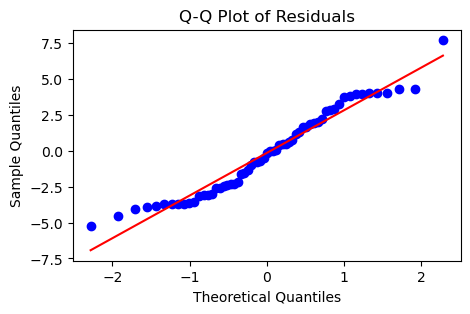

In [98]:
import scipy.stats as stats
# Assuming you have residuals calculated as y_test - y_pred
residuals = y_test - y_pred

# Q-Q plot
plt.figure(figsize=(5, 3))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Regularization.

In [99]:
data.head()

,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,RAD_log,CRIM_log,ZN_log
0,2.31,0.0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0,0.693147,-5.064036,2.944439
1,7.07,0.0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6,1.098612,-3.600502,0.000000
2,7.07,0.0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7,1.098612,-3.601235,0.000000
3,2.18,0.0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4,1.386294,-3.430523,0.000000
4,2.18,0.0,0.458,6.430,58.7,6.0622,222,18.7,394.12,5.21,28.7,1.386294,-3.511570,0.000000


In [100]:

from sklearn.linear_model import Ridge



# Split the data into features (X) and target variable (y)
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model with alpha=0.5
model = Ridge(alpha=1)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
Rmse =np.sqrt( mean_squared_error(y_test, y_pred))
r2 =  r2_score(y_test, y_pred)
print("Root Mean Squared Error:", Rmse)
print("R_square",r2)

Root Mean Squared Error: 2.9575426680615906
R_square 0.7528442282471585


# Lasso.


In [101]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the data into features (X) and target variable (y)
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an ElasticNet model with alpha=0.5 and l1_ratio=0.5
model = ElasticNet(alpha=0.5, l1_ratio=0.5)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
Rmse =np.sqrt( mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Root Mean Squared Error:", Rmse)
print("R_square",r2)



Root Mean Squared Error: 3.3378852618881596
R_square 0.6851878197818002


# Elastic net.

In [102]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Split the data into features (X) and target variable (y)
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an ElasticNet model with alpha=0.5 and l1_ratio=0.5
model = ElasticNet(alpha=0.5, l1_ratio=0.5)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
Rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", Rmse)
print("R square",r2)

Root Mean Squared Error: 3.3378852618881596
R square 0.6851878197818002


# According to the RMSE and R2 the best model was first model of Multiple linear regression with highest R2 of 76   and minimum RMSE of 2.94.

In [103]:
import pickle 
pickle.dump(model_1,open('model.pkl','wb'))